# GMM w/ HMM's

- Discrete HMM: $\pi,A,B$ where $B$ for observations

- GMM: $R,\mu,\Sigma$ where $R$ is responsibilites

#### GMM

M is the number of states and K is the number of data points

- $R$ is a MxK probability matrix (rows sum to 1) 

- $\mu$ is a MxKxD matrix

- $\Sigma$ is a MxKxDxD matrix

$$B(j,t)=\sum_{k=1}^K R(j,k)N(x(t),\mu(j,k),\Sigma(j,k))$$

where $B$ is an observation probability matrix of size MxT and $N$ is the multivariate PDF

Store individual mixture components

$$Comp(j,k,t)=R(j,k)N(x(t),\mu(j,k),\Sigma(j,k))$$

##### EM

E-Step (assign probabilities for each data point for each cluster)

$$\gamma(j,k,t)=\frac{\alpha(t,j)\beta(t,j)}{\sum_{j'=1}^{M}\alpha(t,j')\beta(t,j')}\frac{Comp(j,k,t)}{B(j,t)}$$


M-Step (keep track of the fraction of points assigned to each cluster)

$$\Sigma(j,k)=\frac{\sum_{t=1}^T\gamma(j,k,t)(x(t)-\mu(j,k))(x(t)-\mu(j,k))^T}{\sum_{t=1}^T \gamma(j,k,t)}$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Initialization function
def simple_init():
    M = 1
    K = 1
    D = 1
    pi = np.array([1])
    A = np.array([[1]])
    R = np.array([[1]])
    mu = np.array([[[0]]])
    sigma = np.array([[[[1]]]])
    return M, K, D, pi, A, R, mu, sigma

In [3]:
def big_init():
    M = 5 # 5 states
    K = 3 # 3 Gaussians
    D = 2 # 2 Dimensions

    pi = np.array([1, 0, 0, 0, 0]) # initial state distribution

    A = np.array([
        [0.9, 0.025, 0.025, 0.025, 0.025],
        [0.025, 0.9, 0.025, 0.025, 0.025],
        [0.025, 0.025, 0.9, 0.025, 0.025],
        [0.025, 0.025, 0.025, 0.9, 0.025],
        [0.025, 0.025, 0.025, 0.025, 0.9],
    ]) # state transition matrix - likes to stay where it is

    R = np.ones((M, K)) / K # mixture proportions

    mu = np.array([
        [[0, 0], [1, 1], [2, 2]],
        [[5, 5], [6, 6], [7, 7]],
        [[10, 10], [11, 11], [12, 12]],
        [[15, 15], [16, 16], [17, 17]],
        [[20, 20], [21, 21], [22, 22]],
    ]) # M x K x D

    sigma = np.zeros((M, K, D, D))
    for m in range(M):
        for k in range(K):
            sigma[m,k] = np.eye(D)
    return M, K, D, pi, A, R, mu, sigma

In [4]:
def get_signals(N=20, T=100, init=big_init):
    M, K, D, pi, A, R, mu, sigma = init()
    X = []
    for n in range(N):
        x = np.zeros((T, D))
        s = 0 # initial state is 0 since pi[0] = 1
        r = np.random.choice(K, p=R[s]) # choose mixture
        x[0] = np.random.multivariate_normal(mu[s][r], sigma[s][r])
        for t in range(1, T):
            s = np.random.choice(M, p=A[s]) # choose state
            r = np.random.choice(K, p=R[s]) # choose mixture
            x[t] = np.random.multivariate_normal(mu[s][r], sigma[s][r])
        X.append(x)
    return X

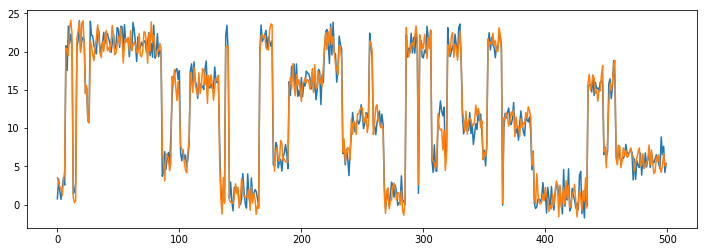

In [8]:
if __name__ == '__main__':
    T = 500
    x = get_signals(1, T)[0]
    axis = range(T)
    
    plt.figure(figsize=(12,4))
    plt.plot(axis, x[:, 0], axis, x[:, 1])
    plt.show()
